In [3]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import numpy as np
import cv2
import torch
import glob as glob

def create_model_FRCCN_RESNET50(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(num_classes = num_classes, pretrained=False, pretrained_backbone = True)
    return model

In [16]:
NUM_CLASSES = 2
CLASSES = [
    "OK",'Furcation'#, 'Grade_1', 'Grade_2', 'Grade_3'
] 
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# load the model and the trained weights
model = create_model_FRCCN_RESNET50(num_classes=NUM_CLASSES).to(device)
model.load_state_dict(torch.load('./model703.pth', map_location=device))
model.eval()

/home/hello/Documents/DDB/.conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hello/Documents/DDB/.conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/hello/Documents/DDB/.conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
/home/hello/Documents/DDB/.conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights_backbone' are deprecated

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [13]:
test_images = glob.glob("./test_data/*[!(xml)]")
print(f"Test instances: {len(test_images)}")

Test instances: 4


In [9]:
path_to_file = './Object-Detection-Metrics-master/'
def SaveLabels(file_name,data):
    f = open(path_to_file+file_name, 'a')
    f.write(data)
    f.write("\n")

In [22]:
def NMS(boxes, overlapThresh = 0.4):
    # Return an empty list, if no boxes given
    if len(boxes) == 0:
        return []
    print("Boxes : ",len(boxes))
    x1 = boxes[:, 0]  # x coordinate of the top-left corner
    y1 = boxes[:, 1]  # y coordinate of the top-left corner
    x2 = boxes[:, 2]  # x coordinate of the bottom-right corner
    y2 = boxes[:, 3]  # y coordinate of the bottom-right corner
    # Compute the area of the bounding boxes and sort the bounding
    # Boxes by the bottom-right y-coordinate of the bounding box
    areas = (x2 - x1 + 1) * (y2 - y1 + 1) # We add 1, because the pixel at the start as well as at the end counts
    # The indices of all boxes at start. We will redundant indices one by one.
    indices = np.arange(len(x1))
    for i,box in enumerate(boxes):
        # Create temporary indices  
        temp_indices = indices[indices!=i]
        # Find out the coordinates of the intersection box
        xx1 = np.maximum(box[0], boxes[temp_indices,0])
        yy1 = np.maximum(box[1], boxes[temp_indices,1])
        xx2 = np.minimum(box[2], boxes[temp_indices,2])
        yy2 = np.minimum(box[3], boxes[temp_indices,3])
        # Find out the width and the height of the intersection box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / areas[temp_indices]
        
#         print("Overlap : ",overlap, "w*h : ",w*h)
        
        # if the actual boungding box has an overlap bigger than treshold with any other box, remove it's index  
        if np.any(overlap > overlapThresh):
            print("Removing : ",overlapThresh,overlap)
            indices = indices[indices != i]
    #return only the boxes at the remaining indices
    return boxes[indices].astype(int)

In [ ]:
# Test(dataset,model)
Test(train_dataset,model)

In [10]:
detection_threshold = 0.5
detection_threshold

0.5

torch.Size([1, 3, 541, 576])
[{'boxes': tensor([[374.5889, 338.1542, 527.4064, 472.8573],
        [131.0873, 451.2933, 324.5278, 541.0000],
        [282.1685, 352.1855, 385.8020, 492.4696],
        [277.7083, 336.4323, 557.8249, 501.3898],
        [383.2925, 381.3700, 566.0822, 519.6515],
        [102.6500, 369.5629, 287.5822, 449.2643],
        [ 91.8976, 415.4247, 383.3549, 541.0000],
        [149.0795, 381.3612, 294.7400, 541.0000],
        [274.5534, 347.8893, 456.1682, 469.8927]]), 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1]), 'scores': tensor([0.9952, 0.9374, 0.7990, 0.5067, 0.2547, 0.1471, 0.1291, 0.1263, 0.1050])}]
draw_boxes
[[374 338 527 472]
 [131 451 324 541]
 [282 352 385 492]
 [277 336 557 501]]
[0.99520469 0.93744534 0.79903269 0.50668782]
Boxes :  4
Removing :  0.5 [1.         0.13866546 1.        ]


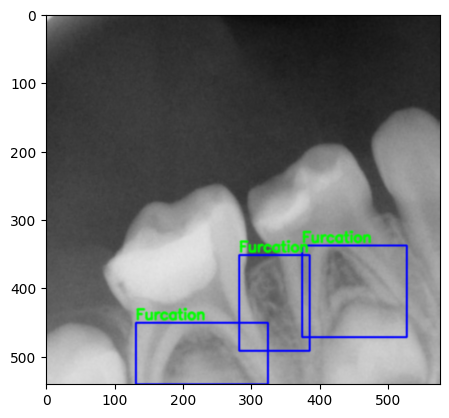

Image 1 done...
--------------------------------------------------
torch.Size([1, 3, 636, 575])
[{'boxes': tensor([[290.9675, 297.1561, 483.8702, 472.9870],
        [ 58.4636, 424.1084, 316.8853, 591.7314],
        [306.2973, 360.4913, 530.1194, 496.0853],
        [258.9529, 257.8091, 538.8674, 516.3039],
        [322.5152, 465.9823, 453.2424, 618.6881],
        [233.8158, 299.8223, 335.3522, 439.8962],
        [288.8014, 444.9889, 534.8042, 608.0589],
        [ 64.4400, 428.6275, 202.4330, 634.5981],
        [  0.0000, 423.1033, 548.1823, 630.6363],
        [147.9184, 448.4631, 340.8180, 612.5640],
        [  8.5688, 432.2531,  71.6892, 629.4899],
        [ 54.0907, 500.5862, 296.4280, 623.3165],
        [247.3919, 350.0706, 555.5015, 616.9346],
        [512.7374, 461.2657, 571.7614, 574.5871],
        [245.3965, 291.5437, 418.8619, 450.7802]]), 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'scores': tensor([0.9829, 0.9712, 0.6657, 0.5190, 0.5171, 0.4508, 0.3182, 0.

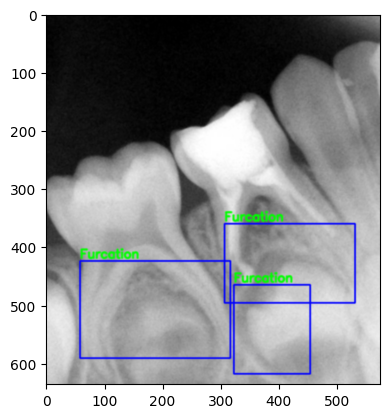

Image 2 done...
--------------------------------------------------
torch.Size([1, 3, 553, 466])
[{'boxes': tensor([[302.0330, 438.5084, 466.0000, 537.7134],
        [109.4575, 315.5253, 299.2722, 421.4023],
        [ 80.8057, 401.1995, 301.0337, 525.6890],
        [313.5641, 305.0688, 459.1157, 412.6293],
        [ 99.9535, 289.4272, 314.9106, 504.0487],
        [321.2261, 353.5593, 466.0000, 553.0000],
        [111.1908, 402.3133, 220.0322, 524.0814],
        [316.3388, 296.9111, 386.6655, 408.3091],
        [103.0092, 433.9256, 273.3062, 513.9025],
        [ 78.0535, 338.4615, 142.4853, 407.5383],
        [  4.2768, 386.6756, 119.0047, 541.0773],
        [199.3228, 300.8601, 305.9920, 443.4601],
        [112.7721, 311.5767, 244.4304, 485.0092],
        [ 97.5326, 399.2094, 160.4781, 540.0140],
        [ 81.1001, 391.1962, 132.7688, 544.7047],
        [300.7826, 288.7515, 357.3724, 425.3278]]), 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'scores': tensor([0.993

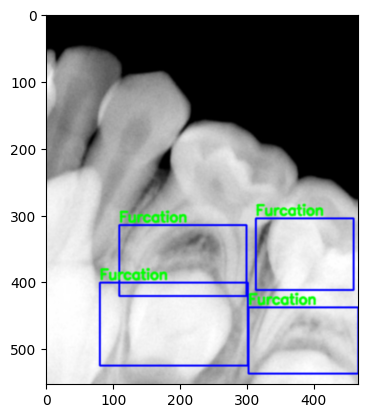

Image 3 done...
--------------------------------------------------
torch.Size([1, 3, 950, 1153])
[{'boxes': tensor([[ 664.8241,  714.2545, 1053.8438,  929.7875],
        [ 200.0379,  597.0261,  567.4077,  846.2993],
        [ 352.0486,  580.1872,  577.0516,  895.6526],
        [ 218.8467,  665.8716,  627.8770,  903.9430],
        [ 132.8631,  524.2420,  604.9785,  928.2390],
        [ 490.2199,  657.7628, 1117.7129,  942.6963],
        [ 111.5150,  642.9116,  856.8260,  909.1437],
        [ 691.2772,  589.0718,  983.3365,  949.9999],
        [ 517.3449,  399.3343,  673.2722,  606.4916],
        [ 605.3729,  620.5991, 1045.3384,  838.2626],
        [ 139.8911,  639.6062,  440.4309,  895.8868],
        [1002.7117,  570.9816, 1153.0000,  806.1103],
        [ 508.6236,  604.3219,  664.5901,  834.0462]]), 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'scores': tensor([0.9881, 0.9727, 0.3088, 0.2567, 0.2228, 0.2089, 0.1606, 0.1311, 0.0872,
        0.0800, 0.0739, 0.0549, 0.0512]

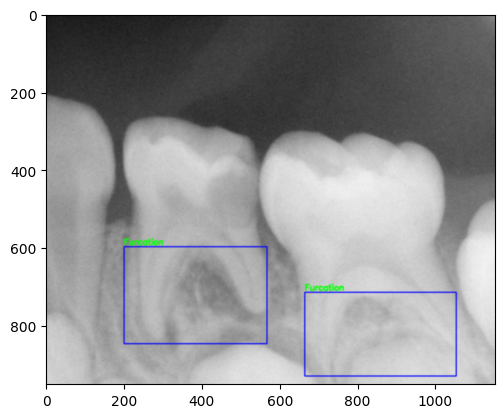

Image 4 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE


In [23]:
# GENERATE and save Predictions data
import matplotlib.pyplot as plt

for i in range(len(test_images)):
    # get the image file name for saving output later on
    image_name = test_images[i].split('/')[-1].split('.')[0]
    image = cv2.imread(test_images[i])
    
#     print(test_images[i])
    
    orig_image = image.copy()
    # BGR to RGB
    image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB).astype(np.float32)
    # make the pixel range between 0 and 1
    image /= 255.0
    # bring color channels to front
    image = np.transpose(image, (2, 0, 1)).astype(float)
    # convert to tensor
    image = torch.tensor(image, dtype=torch.float).cuda()
    # add batch dimension
    image = torch.unsqueeze(image, 0)
    
    print(image.shape)
    
    with torch.no_grad():
        outputs = model(image)
    
    # load all detection to CPU for further operations
    outputs = [{k: v.to('cpu') for k, v in t.items()} for t in outputs]
    
    print(outputs)
    
    # carry further only if there are detected boxes
    if len(outputs[0]['boxes']) != 0:
        boxes = outputs[0]['boxes'].data.numpy()
        scores = outputs[0]['scores'].data.numpy()
        # filter out boxes according to `detection_threshold`
        boxes = boxes[scores >= detection_threshold].astype(np.int32)
        score_above_th = scores[scores >= detection_threshold].astype(float)
        draw_boxes = boxes.copy()
        # get all the predicited class names
        pred_classes = [CLASSES[i] for i in outputs[0]['labels'].cpu().numpy()]
        print("draw_boxes")
        print(draw_boxes)
        print(score_above_th)

        draw_boxes = NMS(draw_boxes,detection_threshold)

        # draw the bounding boxes and write the class name on top of it
        for j, box in enumerate(draw_boxes):
            cv2.rectangle(orig_image,
                        (int(box[0]), int(box[1])),
                        (int(box[2]), int(box[3])),
                        (0, 0, 255), 2)
            cv2.putText(orig_image, pred_classes[j], 
                        (int(box[0]), int(box[1]-5)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 
                        2, lineType=cv2.LINE_AA)
            
        plt.imshow(orig_image, interpolation = 'bicubic')
        plt.show()
        #cv2.imshow('Prediction', orig_image)
        #cv2.waitKey(1)
        cv2.imwrite(f"./PRED/{image_name}.jpg", orig_image)
        
    else:
        print("<<<<<<--------------- No output --------------->>>>>")
    print(f"Image {i+1} done...")
    print('-'*50)
print('TEST PREDICTIONS COMPLETE')